## `1. Data Collection`

### <i>All imports goes here!</i>

In [5]:
import pandas as pd
from IPython.display import display
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np    
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint

dtc = DecisionTreeClassifier()

AttributeError: partially initialized module 'pandas' has no attribute '_pandas_parser_CAPI' (most likely due to a circular import)

### <i>Reading the data</i>


In [16]:
result_2008 = pd.read_csv('Data/Cleaned_Data/cleaned_&_final_2008_result.csv')
result_2013 = pd.read_csv('Data/Cleaned_Data/cleaned_&_final_2013_result.csv')
result_2017 = pd.read_csv('Data/Cleaned_Data/cleaned_&_final_2017_result.csv')
result_2022 = pd.read_csv('Data/Cleaned_Data/cleaned_&_final_2022_result.csv')

display(result_2008.head())
display(result_2013.head())
display(result_2017.head())
display(result_2022.head())

Unnamed: 0      District           Const          WParty     WVotes  Age  \
0           0        Achham        Achham-1             uml  2119.0358   40   
1           1        Achham        Achham-2          maoist  1708.7270   32   
2           2  Arghakhanchi  Arghakhanchi-1          maoist  1966.7836   46   
3           3  Arghakhanchi  Arghakhanchi-2  nepalicongress  1755.1260   46   
4           4       Baglung       Baglung-1          maoist  1828.5047   48   

   TurnOut%  
0     54.53  
1     52.82  
2     55.34  
3     52.05  
4     60.01

Unnamed: 0   District        Const                       WParty   WVotes  \
0           0  Taplejung  Taplejung-1  Nepal Communist Party (UML)   7434.0   
1           1  Taplejung  Taplejung-2  Nepal Communist Party (UML)   7034.0   
2           2  Panchthar  Panchthar-1  Nepal Communist Party (UML)  13082.0   
3           3  Panchthar  Panchthar-2              Nepali Congress  11839.0   
4           4      Illam      Illam-1  Nepal Communist Party (UML)  17342.0   

    Age  TurnOut%  
0  37.0     73.12  
1  48.0     72.60  
2  26.0     72.18  
3  41.0     74.58  
4  55.0     78.58

Unnamed: 0   District        Const                             WParty  \
0           0  Taplejung  Taplejung-1        Nepal Communist Party (UML)   
1           1  Taplejung  Taplejung-1                    Nepali Congress   
2           2  Taplejung  Taplejung-1  Federal Democratic National Front   
3           3  Taplejung  Taplejung-1            Naya Shakti Party Nepal   
4           4  Taplejung  Taplejung-1      Federal Socialist Forum Nepal   

   WVotes  Age   TurnOut%  
0   15417   46  59.060916  
1   10974   51  62.215124  
2     861   57  54.605809  
3     267   41  52.116411  
4     158   45  67.288690

Unnamed: 0   District        Const  \
0           0  Taplejung  Taplejung-1   
1           1  Taplejung  Taplejung-1   
2           2  Taplejung  Taplejung-1   
3           3  Taplejung  Taplejung-1   
4           4  Taplejung  Taplejung-1   

                                              WParty  WVotes  Age   TurnOut%  
0                        Nepal Communist Party (UML)   21943   56  49.859126  
1  Nepal Communist Party (Maoist Center) (Unified...   21735   46  53.744678  
2                  Federal Democratic National Front     941   56  54.895159  
3                      Janata Samajwadi Party, Nepal     628   49  51.052482  
4                         Rastriya Prajatantra Party     406   65  54.328004

### <i>Combining all datasets</i>

In [17]:
file_paths = [
    "Data/Cleaned_Data/cleaned_&_final_2008_result.csv",
    "Data/Cleaned_Data/cleaned_&_final_2013_result.csv",
    "Data/Cleaned_Data/cleaned_&_final_2017_result.csv",
    "Data/Cleaned_Data/cleaned_&_final_2022_result.csv",
]

# Combining all datasets into one DataFrame
dataframes = [pd.read_csv(file) for file in file_paths]
combined_data = pd.concat(dataframes, ignore_index=True)

# Displaying the shape of the combined dataset
print("Combined Dataset Shape:", combined_data.shape)


Combined Dataset Shape: (6165, 7)


## `2. Data Cleaning`

### <i>Checking if there are any missing values</i>

In [18]:
missing_values = combined_data.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Unnamed: 0     0
District       0
Const          0
WParty        47
WVotes        47
Age            0
TurnOut%       0
dtype: int64


### <i>Handling missing values</i>

In [19]:
# Using info to check the data type of missing value columns i.e., WParty and WVotes 
combined_data.info()
# Data type found to be oject and float64 for WParty and WVotes respectively

# For WParty which is of object datatype
for column in combined_data['WParty']:
    
    combined_data['WParty'].fillna(combined_data['WParty'].mode()[0], inplace=True)
    
# For WVoteswhich is of float datatype
for column in combined_data['WVotes']:
       
    combined_data['WVotes'].fillna(combined_data['WVotes'].median(), inplace=True)

# Checking if there are still missing values that persist
missing_values = combined_data.isnull().sum()
print("Missing Values:\n", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6165 entries, 0 to 6164
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6165 non-null   int64  
 1   District    6165 non-null   object 
 2   Const       6165 non-null   object 
 3   WParty      6118 non-null   object 
 4   WVotes      6118 non-null   float64
 5   Age         6165 non-null   float64
 6   TurnOut%    6165 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 337.3+ KB


/tmp/ipykernel_1067/980954949.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['WParty'].fillna(combined_data['WParty'].mode()[0], inplace=True)
/tmp/ipykernel_1067/980954949.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

Missing Values:
 Unnamed: 0    0
District      0
Const         0
WParty        0
WVotes        0
Age           0
TurnOut%      0
dtype: int64


/tmp/ipykernel_1067/980954949.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['WVotes'].fillna(combined_data['WVotes'].median(), inplace=True)
/tmp/ipykernel_1067/980954949.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

### <i>Checking if there are any duplicate values</i>

In [20]:
duplicates = combined_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


### <i>Checking if there are any inconsistencies in data</i>

In [21]:
# Standardizing case and remove leading/trailing spaces
# combined_data['District'] = combined_data['District'].str.lower().str.strip()

mapping_party_name_inconsistencies = {
    'uml' : 'Nepal Communist Party (UML)',
    'nepalicongress':'Nepali Congress',
    'maoist':'Nepal Communist Party (Maoist)',
    'Nepali Congress (BP)':'Nepali Congress',
}

combined_data['WParty'] = combined_data['WParty'].replace(mapping_party_name_inconsistencies)
combined_data.head()

Unnamed: 0      District           Const                          WParty  \
0           0        Achham        Achham-1     Nepal Communist Party (UML)   
1           1        Achham        Achham-2  Nepal Communist Party (Maoist)   
2           2  Arghakhanchi  Arghakhanchi-1  Nepal Communist Party (Maoist)   
3           3  Arghakhanchi  Arghakhanchi-2                 Nepali Congress   
4           4       Baglung       Baglung-1  Nepal Communist Party (Maoist)   

      WVotes   Age  TurnOut%  
0  2119.0358  40.0     54.53  
1  1708.7270  32.0     52.82  
2  1966.7836  46.0     55.34  
3  1755.1260  46.0     52.05  
4  1828.5047  48.0     60.01

## `3. Feature engineering`

### <i>Dropping Unwanted Columns</i>

In [22]:
combined_data = combined_data.drop(columns=['Unnamed: 0'])

### <i>Encoding categorical Variables</i>

#### <i><u>Performing target variable encoding for WParty</u></i>

In [23]:

encoder = LabelEncoder()

combined_data['WParty_Encoded'] = encoder.fit_transform(combined_data['WParty'])

combined_data.head()

District           Const                          WParty     WVotes  \
0        Achham        Achham-1     Nepal Communist Party (UML)  2119.0358   
1        Achham        Achham-2  Nepal Communist Party (Maoist)  1708.7270   
2  Arghakhanchi  Arghakhanchi-1  Nepal Communist Party (Maoist)  1966.7836   
3  Arghakhanchi  Arghakhanchi-2                 Nepali Congress  1755.1260   
4       Baglung       Baglung-1  Nepal Communist Party (Maoist)  1828.5047   

    Age  TurnOut%  WParty_Encoded  
0  40.0     54.53              48  
1  32.0     52.82              45  
2  46.0     55.34              45  
3  46.0     52.05              66  
4  48.0     60.01              45

#### <i><u>Performing one-hot-encoding for District and Const</u></i>

In [24]:
combined_data = pd.get_dummies(combined_data, columns=['District'], drop_first=True)
combined_data = pd.get_dummies(combined_data, columns=['Const'], drop_first=True)

combined_data.head()



WParty     WVotes   Age  TurnOut%  WParty_Encoded  \
0     Nepal Communist Party (UML)  2119.0358  40.0     54.53              48   
1  Nepal Communist Party (Maoist)  1708.7270  32.0     52.82              45   
2  Nepal Communist Party (Maoist)  1966.7836  46.0     55.34              45   
3                 Nepali Congress  1755.1260  46.0     52.05              66   
4  Nepal Communist Party (Maoist)  1828.5047  48.0     60.01              45   

   District_Arghakhanchi  District_Baglung  District_Baitadi  \
0                  False             False             False   
1                  False             False             False   
2                   True             False             False   
3                   True             False             False   
4                  False              True             False   

   District_Bajhang  District_Bajura  ...  Const_Taplejung-2  \
0             False            False  ...              False   
1             False            False  ...              False   
2             False            False  ...              False   
3             False            False  ...              False   
4             False            False  ...              False   

   Const_Tehrathum-1  Const_Tehrathum-2  Const_Terhathum-1  Const_Udayapur-1  \
0              False              False              False             False   
1              False              False              False             False   
2              False              False              False             False   
3              False              False              False             False   
4              False              False              False             False   

   Const_Udayapur-2  Const_Udayapur-3  Const_Udaypur-1  Const_Udaypur-2  \
0             False             False            False            False   
1             False             False            False            False   
2             False             False            False            False   
3             False             False            False            False   
4             False             False            False            False   

   Const_Udaypur-3  
0            False  
1            False  
2            False  
3            False  
4            False  

[5 rows x 401 columns]

## `4. Exploratory Data Analysis`

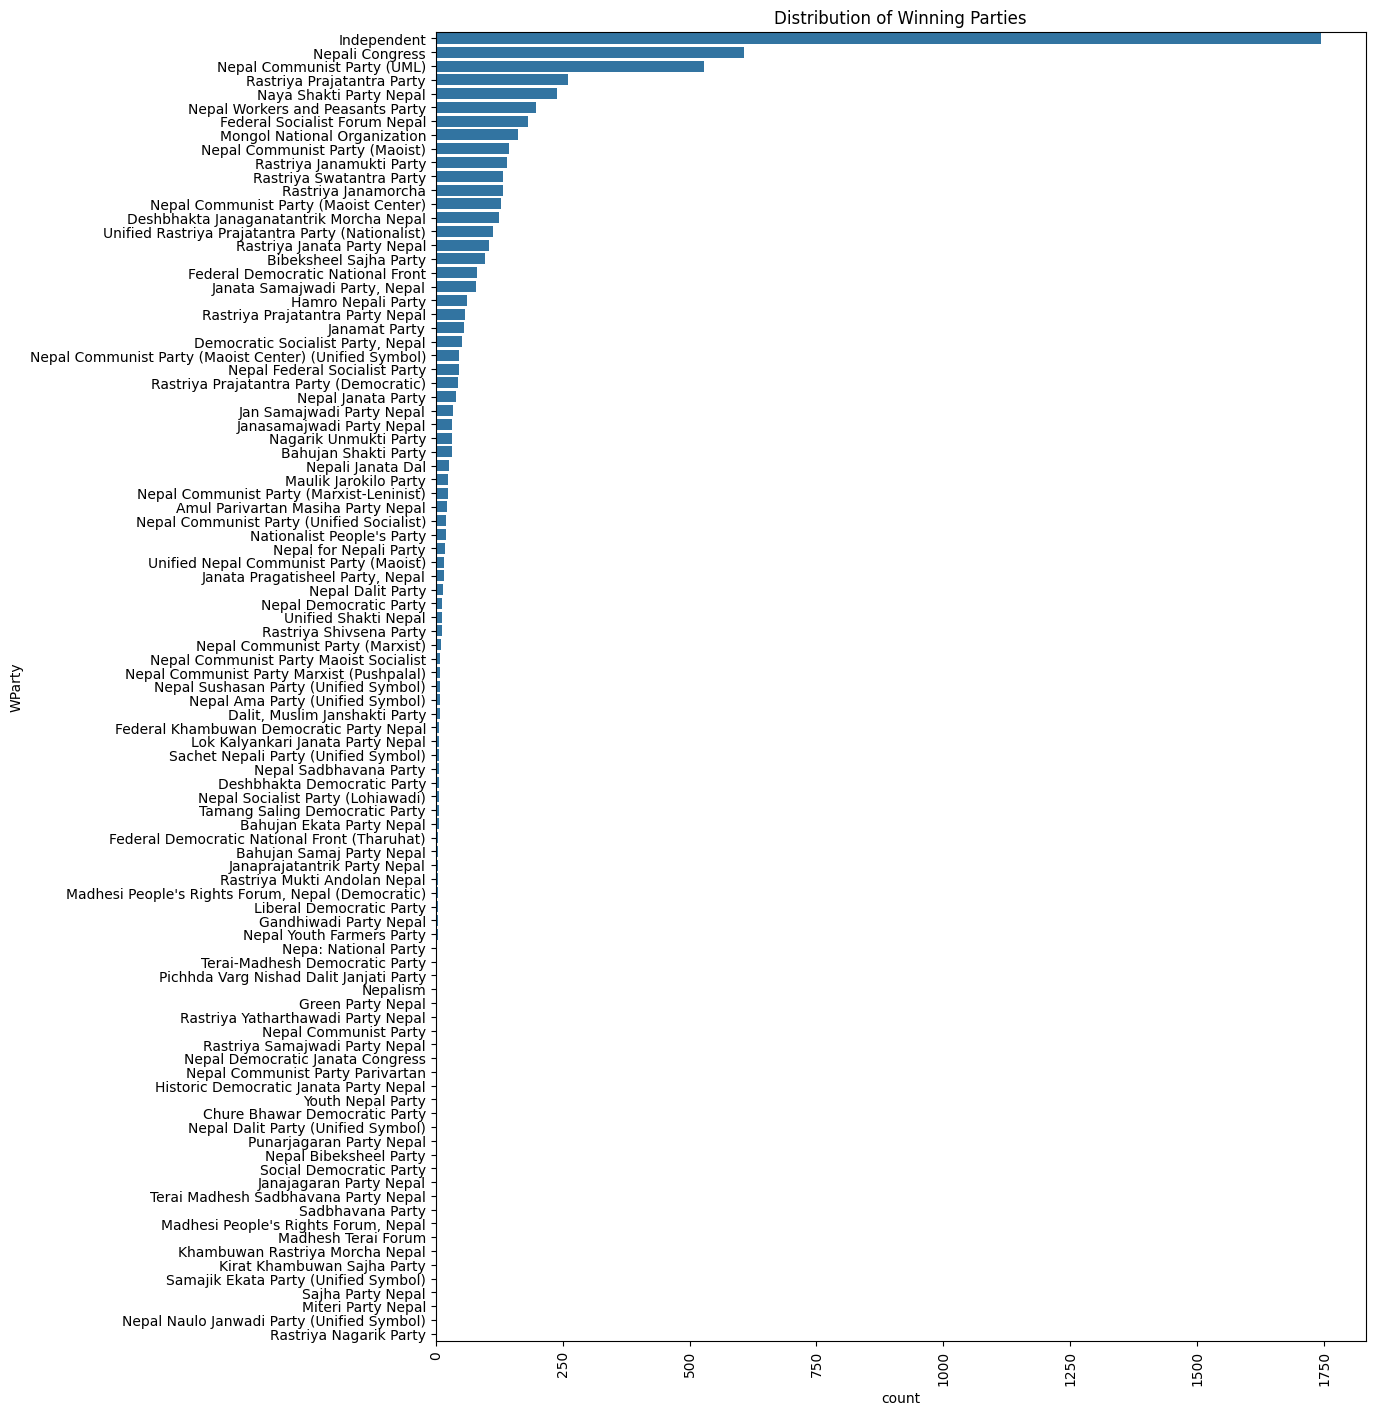

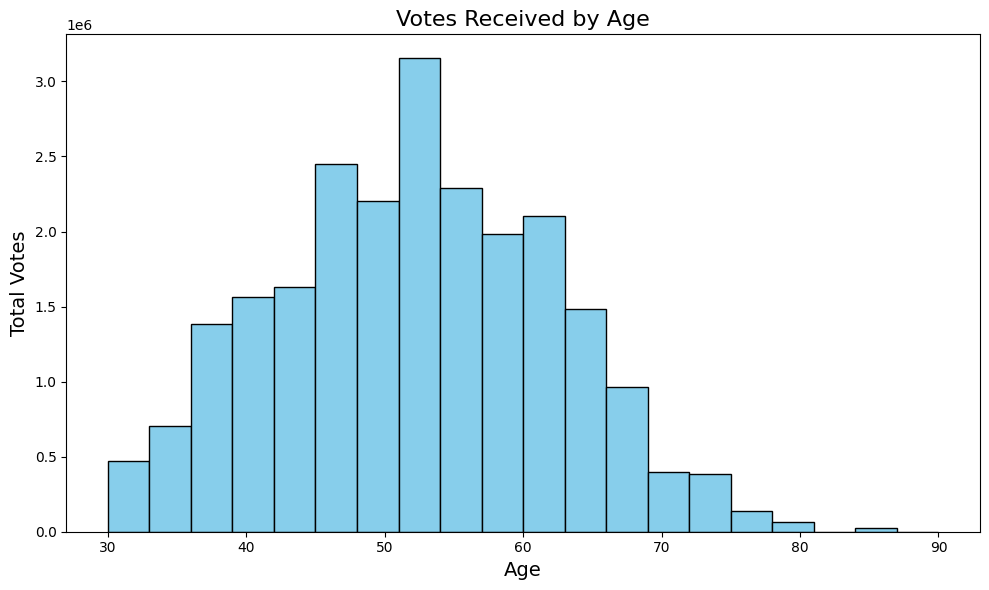

In [25]:
# Plot class distribution
plt.figure(figsize=(12,17))
sns.countplot(y=combined_data['WParty'], order=combined_data['WParty'].value_counts().index)
plt.title("Distribution of Winning Parties")
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(10, 6))
plt.hist(combined_data['Age'], bins=20, range=(30,90), weights=combined_data['WVotes'], color='skyblue', edgecolor='black')
plt.title("Votes Received by Age", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Total Votes", fontsize=14)
plt.tight_layout()
plt.show()

## `5. Model Implementation: Decision Trees`

#### <i>`Step 1:` Splitting the data into features and target</i>

In [12]:
# Features (excluding the target column)
X = combined_data.drop(columns=['WParty', 'WParty_Encoded'])

# Target variable
y = combined_data['WParty_Encoded']

#### <i>`Step 2:` Splitting the data into training and testing sets</i>

In [13]:
# Splitting the data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### <i>`Step 3:` Initializing and training the logistic regression model</i>

In [29]:
dtc.fit(X_train,y_train)
# combined_data.head()

ValueError: could not convert string to float: 'Bara'

#### <i>`Step 4:` Making predictions</i>

In [14]:
y_pred = dtc.predict(X_test)

#### <i>`Step 5:` Evaluating the model</i>

In [15]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14
           4       0.13      0.17      0.15        24
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00        33
          10       0.10      0.14      0.12        21
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         3
          13       0.04      0.05      0.04        39
          14       0.00      0.00      0.00         0
          16       0.06      0.12      0.08         8
          17       0.00      0.00      0.00         0
          18       0.68    

/home/root123/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/root123/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/root123/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/root123/.local/lib/py

In [16]:
# Checking the importance of features

features = pd.DataFrame(dtc.feature_importances_, index=X.columns)
features.head(15)

0
WVotes                 0.305893
Age                    0.130882
TurnOut%               0.172967
District_Arghakhanchi  0.000648
District_Baglung       0.001980
District_Baitadi       0.000648
District_Bajhang       0.000522
District_Bajura        0.000346
District_Banke         0.003159
District_Bara          0.005671
District_Bardia        0.000000
District_Bardiya       0.001632
District_Bhaktapur     0.003998
District_Bhojpur       0.000859
District_Chitwan       0.005532

In [17]:
# Solving overfitting of data

dtc2 = DecisionTreeClassifier(criterion='entropy',ccp_alpha=0.02)

dtc2.fit(X_train,y_train)
y_pred2 = dtc2.predict(X_test)

In [18]:
# Checking the classification report again

print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          18       0.93      0.42      0.58      1182
          19       0.00    

/home/root123/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/root123/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/root123/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
y_probs = dtc2.predict_proba(X_test)


## `5. Model Implementation: Logistic Regression`

In [20]:
# Creating the model

log_rec = LogisticRegression()

log_rec.fit(X_train,y_train)


/home/root123/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
# Making prediction using the model

y_pred3 = log_rec.predict(X_test)

In [22]:
# Checking the performance of the model using Classification Report

print(classification_report(y_pred3, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          18       0.98      0.36      0.53      1478
          19       0.00    

/home/root123/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/root123/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/root123/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
# ROC-AUC for logistic regression model here

## `5. Model Implementation: SVM (Support Vector Machine)`

In [56]:
model = SVC()

model.fit(X_train,y_train)

SVC()

In [25]:
# Predicting using SVM model
y_pred4 = model.predict(X_test)

In [26]:
# Checking the performance of the model using Classification Report
print(classification_report(y_pred4,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          18       0.97      0.37      0.54      1401
          19       0.00    

/home/root123/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/root123/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/root123/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
# ROC-AUC for logistic regression model here 

In [28]:
cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')

/home/root123/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


array([0.35858235, 0.36926287, 0.36369958])

In [ ]:
param_distributions = {
    'svm': {
        'C': uniform(0.1, 10),
        'gamma': uniform(0.01, 1),
        'kernel': ['rbf']
    },
    'logistic_regression': {
        'C': uniform(0.1, 10),  
        'penalty': ['l2', 'none'],  
        'solver': ['lbfgs', 'saga'],  
        'max_iter': [100, 200, 500] 
    },
    'decision_tree': {
        'max_depth': randint(3, 20),  
        'min_samples_split': randint(2, 20), 
        'min_samples_leaf': randint(1, 10),  
        'criterion': ['gini', 'entropy'] 
    }
}

models = {
    'svm': SVC(),
    'logistic_regression': LogisticRegression(),
    'decision_tree': DecisionTreeClassifier()
}

best_params = {}
best_scores = {}

for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_distributions[model_name],
        n_iter=20,
        cv=3,
        verbose=2,
        scoring='accuracy',
        n_jobs=-1,
        random_state=42,
        # error_score='raise',
    )
    
    random_search.fit(X_train, y_train)
    
    best_params[model_name] = random_search.best_params_
    best_scores[model_name] = random_search.best_score_

    print(f"Best Parameters for {model_name}: {random_search.best_params_}")
    print(f"Best Cross-Validation Accuracy for {model_name}: {random_search.best_score_:.4f}")
    print("-" * 50)


Tuning svm...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/home/root123/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[CV] END C=1.6601864044243653, gamma=0.16599452033620266, kernel=rbf; total time= 1.5min
[CV] END C=7.41993941811405, gamma=0.6086584841970366, kernel=rbf; total time= 1.5min
[CV] END C=1.6601864044243653, gamma=0.16599452033620266, kernel=rbf; total time= 1.5min
[CV] END C=0.6808361216819946, gamma=0.8761761457749352, kernel=rbf; total time= 1.5min
[CV] END C=1.6601864044243653, gamma=0.16599452033620266, kernel=rbf; total time= 1.6min
[CV] END C=3.845401188473625, gamma=0.9607143064099162, kernel=rbf; total time= 1.6min
[CV] END C=7.41993941811405, gamma=0.6086584841970366, kernel=rbf; total time= 1.7min
[CV] END C=3.845401188473625, gamma=0.9607143064099162, kernel=rbf; total time= 1.8min
[CV] END C=3.845401188473625, gamma=0.9607143064099162, kernel=rbf; total time= 1.8min
[CV] END C=0.6808361216819946, gamma=0.8761761457749352, kernel=rbf; total time= 2.0min
[CV] END C=7.41993941811405, gamma=0.6086584841970366, kernel=rbf; total time= 2.1min
[CV] END C=0.6808361216819946, gamma=0

/home/root123/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/root123/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/root123/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https:

[CV] END C=3.845401188473625, max_iter=100, penalty=l2, solver=lbfgs; total time=   2.9s
[CV] END C=6.2165316048828085, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=6.2165316048828085, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=6.2165316048828085, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=3.845401188473625, max_iter=100, penalty=l2, solver=lbfgs; total time=   3.0s


/home/root123/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=3.845401188473625, max_iter=100, penalty=l2, solver=lbfgs; total time=   3.2s


/home/root123/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=7.896910002727692, max_iter=100, penalty=l2, solver=saga; total time=  36.2s
[CV] END C=0.5666566321361542, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.5666566321361542, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.5666566321361542, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END C=7.951759613930136, max_iter=500, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=7.951759613930136, max_iter=500, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=7.951759613930136, max_iter=500, penalty=none, solver=lbfgs; total time=   0.0s


/home/root123/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/root123/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.9182496720710063, max_iter=100, penalty=l2, solver=saga; total time=  36.7s
[CV] END C=7.896910002727692, max_iter=100, penalty=l2, solver=saga; total time=  37.0s


/home/root123/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=7.896910002727692, max_iter=100, penalty=l2, solver=saga; total time=  37.5s
[CV] END C=0.2326496115986653, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.2326496115986653, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.2326496115986653, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=8.18397348116461, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=8.18397348116461, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=8.18397348116461, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=2.40893825622149, max_iter=500, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=2.40893825622149, max_iter=500, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=2.40893825622149, max_iter=500, penalty=none, solver=lbfgs; total time=   0.0s


/home/root123/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.9182496720710063, max_iter=100, penalty=l2, solver=saga; total time=  37.6s


/home/root123/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=9.932308858067882, max_iter=100, penalty=l2, solver=lbfgs; total time=   3.1s


/home/root123/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/root123/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

[CV] END C=9.932308858067882, max_iter=100, penalty=l2, solver=lbfgs; total time=   3.2s
[CV] END C=6.175448519014383, max_iter=100, penalty=l2, solver=lbfgs; total time=   3.3s


/home/root123/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.9182496720710063, max_iter=100, penalty=l2, solver=saga; total time=  41.4s
[CV] END C=4.010606075732408, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END C=4.010606075732408, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END C=4.010606075732408, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END C=3.21711076089411, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END C=3.21711076089411, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END C=3.21711076089411, max_iter=200, penalty=none, solver=saga; total time=   0.0s


/home/root123/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=9.932308858067882, max_iter=100, penalty=l2, solver=lbfgs; total time=   3.3s


/home/root123/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=6.175448519014383, max_iter=100, penalty=l2, solver=lbfgs; total time=   3.3s


/home/root123/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=6.175448519014383, max_iter=100, penalty=l2, solver=lbfgs; total time=   3.3s
[CV] END C=7.851328233611145, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END C=7.851328233611145, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END C=7.851328233611145, max_iter=200, penalty=none, solver=saga; total time=   0.0s


/home/root123/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=5.777003278199914, max_iter=100, penalty=l2, solver=saga; total time=  36.8s


/home/root123/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=5.777003278199914, max_iter=100, penalty=l2, solver=saga; total time=  37.0s


/home/root123/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=5.777003278199914, max_iter=100, penalty=l2, solver=saga; total time=  38.6s


/home/root123/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=3.0122914019804194, max_iter=500, penalty=l2, solver=saga; total time= 2.7min


/home/root123/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/root123/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.6599452033620266, max_iter=500, penalty=l2, solver=saga; total time= 2.8min
[CV] END C=1.6599452033620266, max_iter=500, penalty=l2, solver=saga; total time= 2.8min


/home/root123/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=3.0122914019804194, max_iter=500, penalty=l2, solver=saga; total time= 2.8min


/home/root123/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.6599452033620266, max_iter=500, penalty=l2, solver=saga; total time= 2.8min


/home/root123/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=3.0122914019804194, max_iter=500, penalty=l2, solver=saga; total time= 2.8min


/home/root123/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=6.199966577826209, max_iter=500, penalty=l2, solver=saga; total time= 2.5min


/home/root123/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=6.199966577826209, max_iter=500, penalty=l2, solver=saga; total time= 2.5min


/home/root123/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/root123/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
33 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/home/root123/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/root123/.local/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator.

[CV] END C=6.199966577826209, max_iter=500, penalty=l2, solver=saga; total time= 1.7min
Best Parameters for logistic_regression: {'C': np.float64(1.6599452033620266), 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}
Best Cross-Validation Accuracy for logistic_regression: 0.3585
--------------------------------------------------
Tuning decision_tree...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/home/root123/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/root123/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[CV] END criterion=gini, max_depth=17, min_samples_leaf=8, min_samples_split=8; total time=   0.1s
[CV] END criterion=gini, max_depth=17, min_samples_leaf=8, min_samples_split=8; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=17, min_samples_leaf=8, min_samples_split=8; total time=   0.1s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=8, min_samples_split=5; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=8, min_samples_split=5; total time=   0.1s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=8, min_samples_split=5; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=13; total time=

## `Model Evaluation Using ROC-AUC`

In [1]:
def calculate_roc_auc(y_test, y_probs, classes):
    all_classes_in_y_test = np.unique(y_test)
    missing_in_y_probs = set(all_classes_in_y_test) - set(classes)
    missing_in_y_test = set(classes) - set(all_classes_in_y_test)

    if missing_in_y_test:
        indices_to_keep = [i for i, cls in enumerate(classes) if cls not in missing_in_y_test]
        y_probs = y_probs[:, indices_to_keep]
        classes = [cls for cls in classes if cls not in missing_in_y_test]

    y_test_binarized = label_binarize(y_test, classes=classes)

    if y_test_binarized.shape[1] == y_probs.shape[1]:
        roc_auc = roc_auc_score(y_test_binarized, y_probs, multi_class='ovr')
        return roc_auc
    else:
        print("Mismatch between y_test and y_probs after adjustment.")
        return None

roc_auc_scores = {}

for model_name, random_search in zip(models.keys(), [random_search for _ in range(3)]):
    model = random_search.best_estimator_  
    
    if hasattr(model, 'predict_proba'): 
        y_probs = model.predict_proba(X_test)
        roc_auc_scores[model_name] = calculate_roc_auc(y_test, y_probs, model.classes_)
    else:
        print(f"{model_name} does not support probability prediction.")
    
    if roc_auc_scores.get(model_name):
        print(f"ROC-AUC for {model_name}: {roc_auc_scores[model_name]:.4f}")
    else:
        print(f"{model_name} failed to calculate ROC-AUC.")


KeyboardInterrupt: 